In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [57]:
df=pd.read_csv('insurance.csv')

In [58]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,NaN,27.900,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1438 entries, 0 to 1437
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1367 non-null   float64
 1   sex       1367 non-null   object 
 2   bmi       1367 non-null   float64
 3   children  1438 non-null   int64  
 4   smoker    1438 non-null   object 
 5   region    1367 non-null   object 
 6   charges   1438 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 78.8+ KB


In [60]:
df.describe()

,age,bmi,children,charges
count,1367.000000,1367.000000,1438.000000,1438.000000
mean,39.389905,30.466240,1.197497,14263.806370
std,14.025264,6.177811,1.307840,12869.081884
min,18.000000,15.000000,0.000000,1121.873900
25%,27.000000,26.030000,0.000000,4908.572200
50%,40.000000,30.250000,1.000000,9794.877050
75%,51.000000,34.457500,2.000000,19135.377290
max,64.000000,53.130000,5.000000,63770.428010


In [61]:
#Target variable (y): charges

#Feature variables (X): age, sex, bmi, children, smoker, region

In [62]:
#Checking for Missing Values
df.isna().sum()

age         71
sex         71
bmi         71
children     0
smoker       0
region      71
charges      0
dtype: int64

In [63]:
df.isnull().sum()

age         71
sex         71
bmi         71
children     0
smoker       0
region      71
charges      0
dtype: int64

In [64]:
df.describe()

,age,bmi,children,charges
count,1367.000000,1367.000000,1438.000000,1438.000000
mean,39.389905,30.466240,1.197497,14263.806370
std,14.025264,6.177811,1.307840,12869.081884
min,18.000000,15.000000,0.000000,1121.873900
25%,27.000000,26.030000,0.000000,4908.572200
50%,40.000000,30.250000,1.000000,9794.877050
75%,51.000000,34.457500,2.000000,19135.377290
max,64.000000,53.130000,5.000000,63770.428010


In [65]:
# Numerical features
df['age'] = df['age'].fillna(df['age'].median())
df['bmi'] = df['bmi'].fillna(df['bmi'].median())

# Categorical features
df['sex'] = df['sex'].fillna(df['sex'].mode()[0])
df['region'] = df['region'].fillna(df['region'].mode()[0])


In [66]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [67]:
df_encoded = pd.get_dummies(
    df,
    columns=['sex', 'smoker', 'region'],
    drop_first=True
)


In [68]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numerical_cols = ['age', 'bmi', 'children']
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])


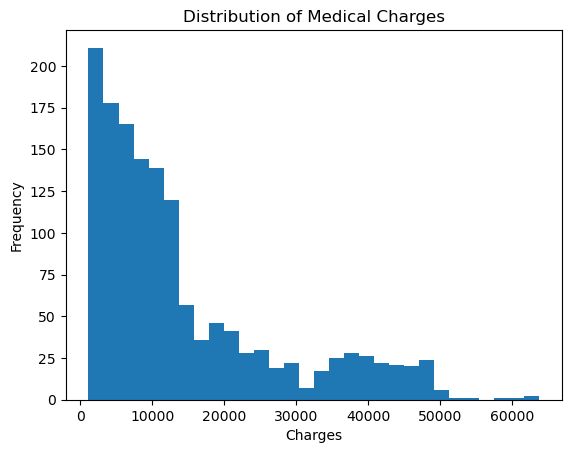

In [69]:
import matplotlib.pyplot as plt

plt.hist(df['charges'], bins=30)
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.title('Distribution of Medical Charges')
plt.show()


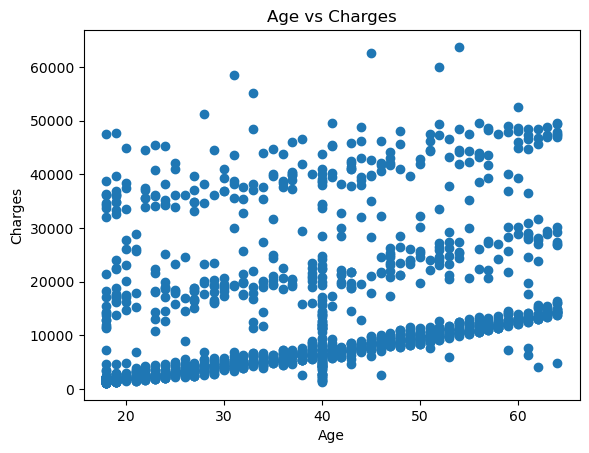

In [70]:
plt.scatter(df['age'], df['charges'])
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Age vs Charges')
plt.show()


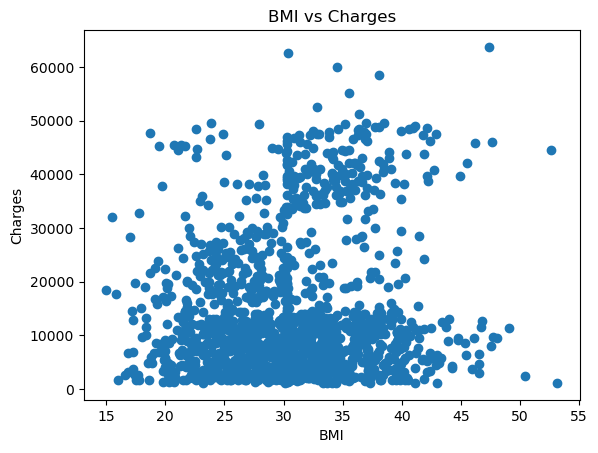

In [71]:
plt.scatter(df['bmi'], df['charges'])
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('BMI vs Charges')
plt.show()


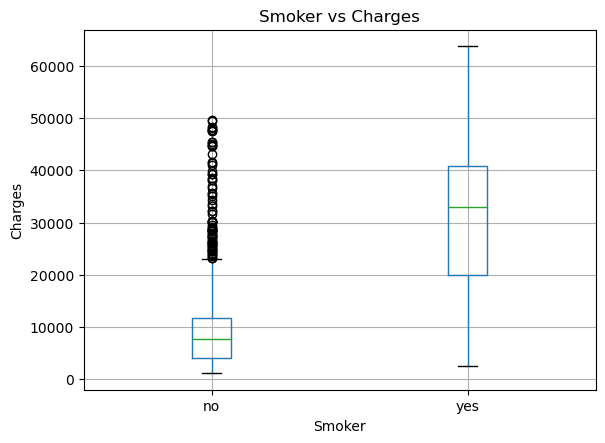

In [72]:
df.boxplot(column='charges', by='smoker')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.title('Smoker vs Charges')
plt.suptitle('')
plt.show()


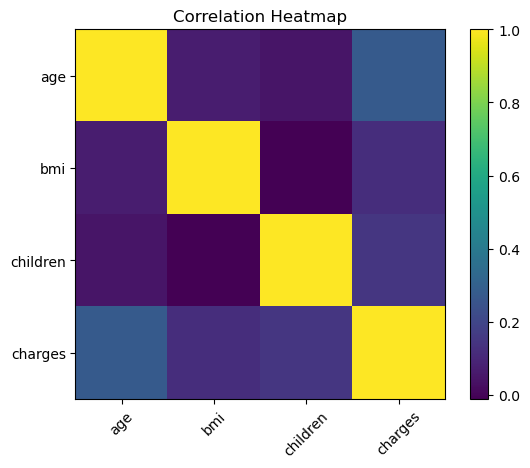

In [75]:
import matplotlib.pyplot as plt

# Select only numerical columns
corr = df.select_dtypes(include='number').corr()

plt.imshow(corr)
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
#Key Insights from Exploratory Data Analysis

#Smoking status has a strong impact on medical charges.
#people who smoke have much higher insurance charges than non-smokers.

#Medical charges increase with age and BMI.
#As age and BMI increase, medical charges generally increase, showing a positive relationship between these variables.

In [77]:
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']


In [78]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [79]:
#Train
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [80]:
print("Intercept:", model.intercept_)

coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

print(coefficients)


Intercept: 10145.045463020331
            Feature   Coefficient
0               age   3379.647677
1               bmi   1407.571315
2          children   1436.152514
3          sex_male    284.137173
4        smoker_yes  21177.751634
5  region_northwest  -1041.448567
6  region_southeast   -573.014555
7  region_southwest  -1462.757386


In [84]:
#Model Evaluation
y_pred = model.predict(X_test)


In [85]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)


Mean Absolute Error (MAE): 5516.143547172713
Mean Squared Error (MSE): 64124102.05192937
Root Mean Squared Error (RMSE): 8007.752621799038
R-squared (R2): 0.6534854893901869


In [86]:
#Task 3: Concept Discussion
#Overfitting

#Overfitting happens when a model learns the training data too well.

#Underfitting

#Underfitting happens when a model is too simple to understand the underlying patterns in the data.
#It performs poorly on both training and test data.

#Bias

#Bias refers to errors caused by overly simple assumptions in a model.

#Variance

#Variance refers to how much a model’s predictions change when trained on different datasets.


In [87]:
#Customer Term Deposit Prediction

In [89]:
import pandas as pd

df = pd.read_csv("bank.csv")


In [90]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [92]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [93]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [112]:


df_encoded = pd.get_dummies(df, drop_first=True)


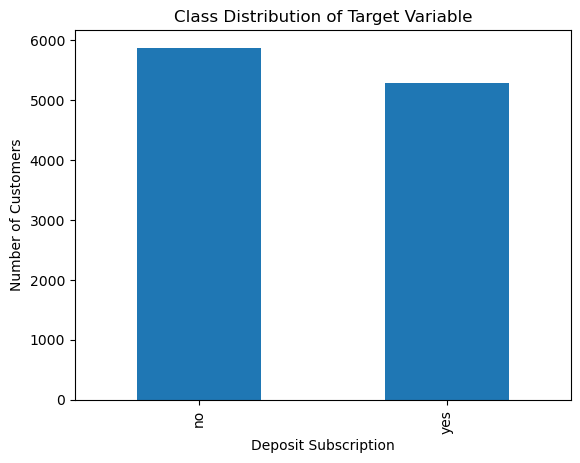

In [97]:
import matplotlib.pyplot as plt

df['deposit'].value_counts().plot(kind='bar')
plt.xlabel('Deposit Subscription')
plt.ylabel('Number of Customers')
plt.title('Class Distribution of Target Variable')
plt.show()


In [107]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced', max_iter=3000)


In [108]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('deposit_yes', axis=1)
y = df_encoded['deposit_yes']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [109]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced', max_iter=3000)
model.fit(X_train, y_train)


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', max_iter=3000)

In [110]:
y_pred = model.predict(X_test)


In [111]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8096730855351545

Classification Report:
               precision    recall  f1-score   support

       False       0.82      0.82      0.82      1166
        True       0.80      0.80      0.80      1067

    accuracy                           0.81      2233
   macro avg       0.81      0.81      0.81      2233
weighted avg       0.81      0.81      0.81      2233


Confusion Matrix:
 [[957 209]
 [216 851]]


In [ ]:
#Recall is the most suitable evaluation metric because it correctly identify customers
#who will subscribe to a term deposit when the dataset is imbalanced.